# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

In [2]:
# Your code here. 

student=pd.read_csv("../data/student.csv")
student.head()

,StudentID,Age,Tardies
0,1,17,10
1,2,51,1
2,3,27,5
3,4,21,9
4,5,36,4


Draw a dispersion diagram (scatter plot) for the data.

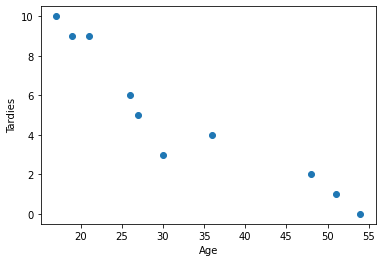

In [3]:
# Your code here.
plt.scatter(x=student['Age'],y=student['Tardies'])
plt.xlabel("Age")
plt.ylabel("Tardies")
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 

#At least from this data set, the younger you are, the more likly that you will be late for the class. 

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.

covariance = student[['Age','Tardies']].cov()
correlation = student[['Age','Tardies']].corr()

print("Covariance:\n", covariance)
print("Correlation:\n", correlation)

Covariance:
                 Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444
Correlation:
               Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000


In [6]:
# Whilst correlation tells us the correlation of two variables, 
#covariance tells us more information on the direction of correlation whether it's negative or postiive correlation. 

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [7]:
pip install statsmodels 

You should consider upgrading via the '/usr/local/Cellar/jupyterlab/2.1.2/libexec/bin/python3.8 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [8]:
# Your response here.
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [9]:
model = LinearRegression()
#Define the X and Y variable and reshape them
X = student['Age'].values.reshape(-1,1) #Francesca : Paolo, why do we need to reshape them? 
Y = student['Tardies'].values.reshape(-1,1)
#Fitting the model
model.fit(X, Y)

LinearRegression()

In [10]:
#Define my predictions and add them to the dataset as a new column
predictions = model.predict(X)

#Adding the column and visualizing the data
student['Predictions'] = predictions
student

,StudentID,Age,Tardies,Predictions
0,1,17,10,8.760850
1,2,51,1,0.504944
2,3,27,5,6.332643
3,4,21,9,7.789567
4,5,36,4,4.147256
5,6,48,2,1.233406
6,7,19,9,8.275209
7,8,26,6,6.575463
8,9,54,0,-0.223518
9,10,30,3,5.604180


In [11]:
score = model.score(X,Y)
print("R2:",score)

R2: 0.8820265558250109


Plot your regression model on your scatter plot.

In [12]:
# Your code here.
X = student['Age']
Y = student['Tardies']

<AxesSubplot:xlabel='Age', ylabel='Tardies'>

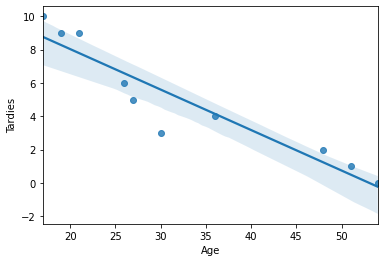

In [13]:
sns.regplot(x="Age", y="Tardies", data=student)

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [14]:
#Considering how the R2 score is 0.88, we can confidently say that our model has a higher chance of predictability as it's very close to 1. 

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set that you can download from [here](https://drive.google.com/file/d/1EyAN0RXmAM5OLzKcxyWqdExQJ3KiswO9/view?usp=sharing). Please place the data it in the provided data folder for this lab. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [15]:
# Import any libraries you may need 

cars=pd.read_csv("../data/vehicles.csv")

In [16]:
# Import the data

cars.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [17]:
# Your response here.
#corr = cars.corr()
#corr['CO2 Emission Grams/Mile'].sort_values(ascending=False)[2:].nlargest(5)

corr = cars.corr()
corr['CO2 Emission Grams/Mile'].sort_values(ascending=False)

#Using top 3 strongest correlations from below will be suitable. Therefore in the order of Fuel Cost/ Year, Cylinders, Year and Combined MPG. 

CO2 Emission Grams/Mile    1.000000
Fuel Barrels/Year          0.986189
Fuel Cost/Year             0.930865
Engine Displacement        0.803520
Cylinders                  0.752393
Year                      -0.222300
City MPG                  -0.894139
Combined MPG              -0.926229
Highway MPG               -0.926405
Name: CO2 Emission Grams/Mile, dtype: float64

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [19]:
from sklearn.metrics import r2_score

In [20]:
# Your response here.  


X = cars[['Fuel Barrels/Year', 'Fuel Cost/Year', 'Cylinders', 'Year']]
Y = cars['CO2 Emission Grams/Mile']

# Build
model = sm.OLS(Y,X)
# Fit
results = model.fit()  ## -> SSE/OLS Procedure 
# Predict
predictions = results.predict(X)
# Summary
print('The r-squared score of our model is:', r2_score(Y, predictions))
# Build


The r-squared score of our model is: 0.9772846038236649


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [ ]:
# Your response here. 

#OLS model can assess more than 1 variable. Also when we calculate r2 score, it gave 0.97, very near to 1.0 value which implies its high predictability. 
#Francesca : is it right to say like that? 

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [ ]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [ ]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [ ]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [ ]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 